In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file_list = ["Ref", "Sup", "Pel"]

In [3]:
df = {}

for file in file_list:
    df[file] = pd.read_csv(f"rnafold_output/{file}_fil_1_energy.txt", header=None)
    df[file].rename(columns={0:"values"}, inplace=True)

In [4]:
num_bins = 20
min_value = -10
max_value = 0
bin_edges = np.linspace(min_value, max_value, num_bins + 1)
x_values = np.linspace(min_value, max_value, num_bins + 2)

df_counts = {}
df_freq = {}

for file in file_list:
    df[file]["bin"] = np.digitize(df[file]["values"], bin_edges)
    df_counts[file] = np.bincount(df[file]["bin"])
    df_freq[file] = df_counts[file] / len(df[file]["bin"])

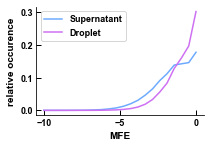

In [5]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 9
plt.rcParams['font.weight'] = 'bold'

plt.figure(figsize=(3, 2))
plt.plot(x_values, df_freq["Sup"], label = "Supernatant", color="#6daaff")
plt.plot(x_values, df_freq["Pel"], label = "Droplet", color="#CE70F2")

plt.legend(loc="upper left")
plt.xlabel("MFE", weight="bold", fontsize=10)
plt.ylabel("relative occurence", weight="bold", fontsize=10)

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.tick_params(axis="both", direction="in", length=5, width=1)
#plt.gca().set_xticklabels([])
#plt.gca().set_yticklabels([])
plt.yticks([0, 0.1, 0.2, 0.3])
plt.xticks([-10, -5, 0])

plt.savefig(fname="mfe.pdf", bbox_inches='tight', pad_inches=0.1)
plt.show()

In [6]:
df_avg = {}

for file in file_list:
    df_avg[file] = df[file]["values"].mean()
    print(f"{file}: {round(float(df_avg[file]), 3)}")

Ref: -1.292
Sup: -1.446
Pel: -0.873
